In [1]:
!pwd

/home/giakhang/dev/YOLOF-Mask


In [2]:
#!mkdir ./datasets
#!ln -s /media/giakhang/OS/dataset/coco2017 ./datasets

In [3]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

from detectron2.config import LazyConfig, instantiate
from detectron2.data.datasets import register_coco_instances

In [4]:
config_file = './configs/InstanceSegmentation/yolof_mask_RegNetY_4gf_SAM_3x.py'
cfg = LazyConfig.load(config_file)

./configs/common/data/coco.py:38: UserWarning: Argument(s) 'hue_shift, sat_shift, val_shift' are not valid for transform HueSaturationValue
  AlbumentationsWrapper(A.HueSaturationValue(hue_shift=20, sat_shift=30, val_shift=20, p=0.5)),


In [5]:
d_name = 'coco2017_train'
annot_phase_path = './datasets/coco2017/coco2017/annotations/instances_train2017.json'
img_phase_dir = './datasets/coco2017/coco2017/train2017'

register_coco_instances(
    d_name, 
    {},
    annot_phase_path,
    img_phase_dir
)

In [6]:
classes = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 
    'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [7]:
train_loader = instantiate(cfg.dataloader.train)  
train_loader_iter = iter(train_loader)

filtered out 456632 instances with box_area <= 4000


In [8]:
data = next(train_loader_iter)

In [9]:
img_idx = 0
ins_idx = 0

img = data[img_idx]['image'].detach().cpu().numpy()
box = list(map(lambda x: int(x), data[img_idx]['instances'][ins_idx].gt_boxes.tensor[0].cpu().numpy()))
cls_id = data[img_idx]['instances'][ins_idx].gt_classes.item() 
mask = data[img_idx]['instances'][ins_idx].gt_masks.tensor.cpu().numpy().astype(np.uint8)[0]
cls_name = classes[cls_id]

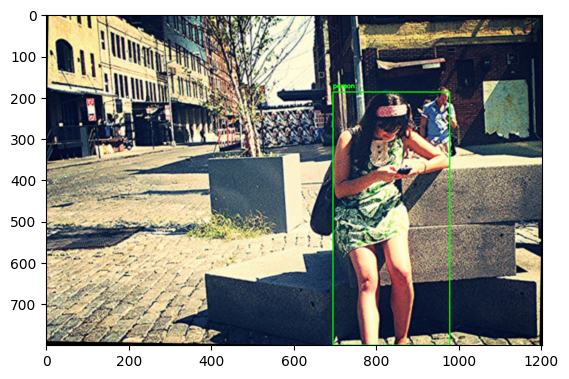

In [10]:
img = np.transpose(img, (1, 2, 0))
img = img[:, :, ::-1]  # BGR to RGB
img = img.astype(np.uint8)
img = np.ascontiguousarray(img)

#img = cv2.bitwise_and(img, img, mask=mask)
img = cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
img = cv2.putText(img, cls_name, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(img)

In [11]:
box_area = (box[2] - box[0]) * (box[3] - box[1])
print(f'box area: {box_area}')

box area: 173196


In [12]:
cls_name

'person'